In [10]:
import json
import country_converter as coco
from datetime import datetime, timedelta
import requests
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [11]:
locations_cnt = pd.read_csv("data-1670821866287.csv")
#locations_cnt.head()

In [12]:
# Setting the path to the shapefile
SHAPEFILE = '/Users/katerina/Library/CloudStorage/OneDrive-EastCarolinaUniversity/Herndon/Heatmap/ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp'

# Read shapefile using Geopandas
geo_df = gpd.read_file(SHAPEFILE)[['ADMIN', 'ADM0_A3', 'geometry']]

# Rename columns.
geo_df.columns = ['country', 'country_code', 'geometry']
#geo_df.head(3)


In [13]:
# Drop row for 'Antarctica'.
geo_df = geo_df.drop(geo_df.loc[geo_df['country'] == 'Antarctica'].index)
# Print the map
#geo_df.plot(figsize=(20, 20), edgecolor='white', linewidth=1, color='lightblue')

In [14]:
# Merge the two dataframes
merged_df = pd.merge(left=geo_df, right=locations_cnt, how='left', left_on='country', right_on='countryname')
merged_df

# Delete some columns that we won't use
df = merged_df.drop(['geo_location_id', 'location_id', 'capitallatitude', 'capitallongitude'], axis=1)
#df.head()
#Create the indicator values
#df['case_growth_rate'] = round(df['cases']/df['cases_cum'], 2)
df['cnt_loc'].fillna(0, inplace=True) 
#df.head(3)

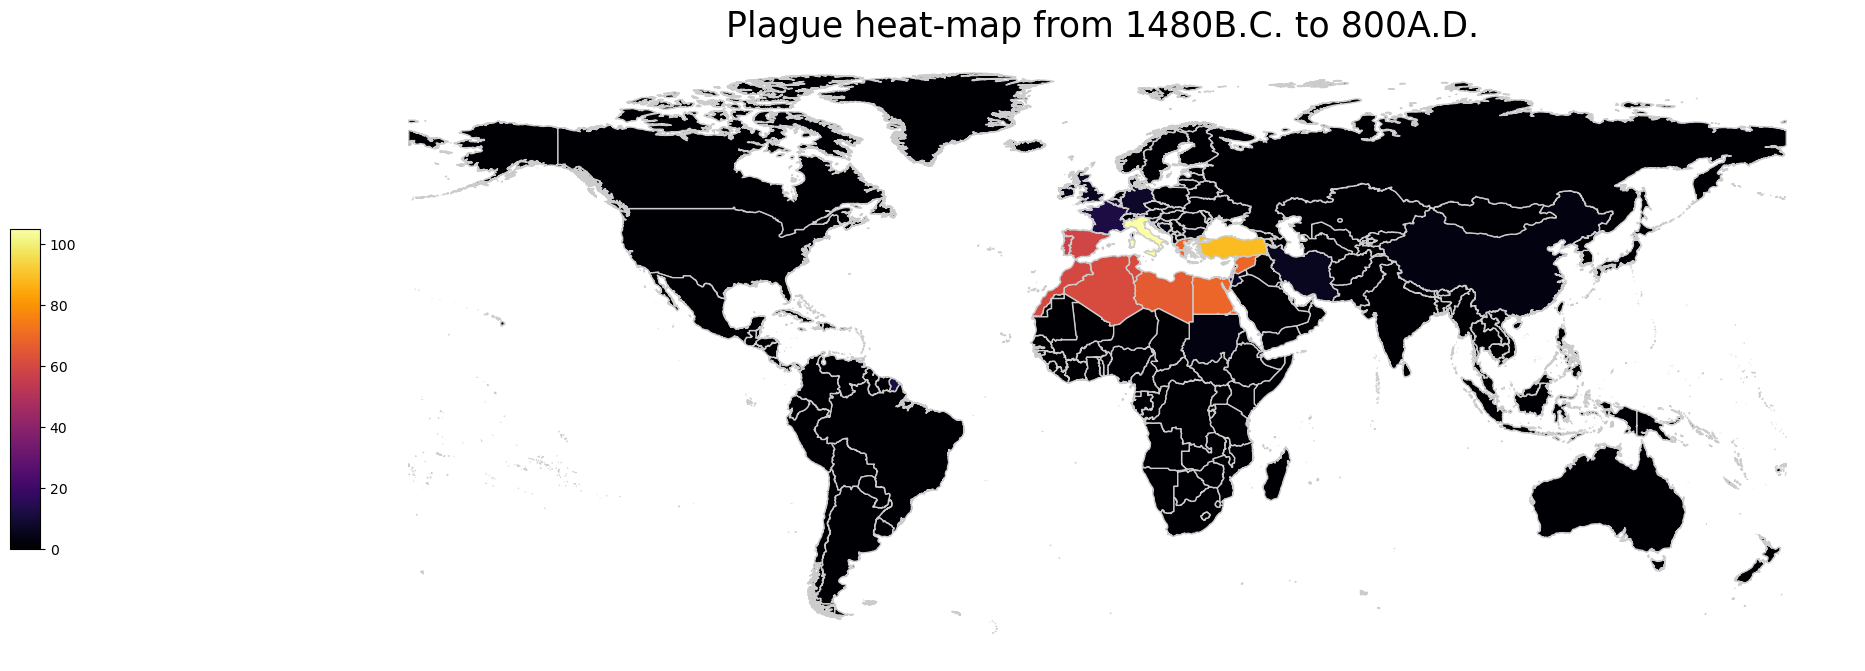

In [15]:
# Print the map
# Set the range for the choropleth
title = ' Plague heat-map from 1480B.C. to 800A.D.'
col = 'cnt_loc'
#source = 'Source: '
vmin = df[col].min()
vmax = df[col].max()
cmap = 'inferno'

# Create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(30, 8))

# Remove the axis
ax.axis('off')
df.plot(column=col, ax=ax, edgecolor='0.8', linewidth=1, cmap=cmap)

# Add a title
ax.set_title(title, fontdict={'fontsize': '25', 'fontweight': '3'})

# Create an annotation for the data source
#ax.annotate(source, xy=(0.1, .08), xycoords='figure fraction', horizontalalignment='left', 
   #         verticalalignment='bottom', fontsize=10)
            
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax), cmap=cmap)

# Empty array for the data range
sm._A = []

# Add the colorbar to the figure
cbaxes = fig.add_axes([0.15, 0.25, 0.01, 0.4])
cbar = fig.colorbar(sm, cax=cbaxes)


In [16]:
# Safe the map to a png
fig.savefig('map_export.png', dpi=300)